In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [60]:
trainSet = pd.read_csv(os.getcwd()+'/train.csv')
testSet = pd.read_csv(os.getcwd()+'/test.csv')
songsSet = pd.read_csv(os.getcwd()+'/songs.csv')
membersSet = pd.read_csv(os.getcwd()+'/members.csv')
sampleSet = pd.read_csv(os.getcwd()+'/sample_submission.csv')


In [47]:
print(trainSet.info())
print(trainSet.describe())
print(trainSet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB
None
             target
count  7.377418e+06
mean   5.035171e-01
std    4.999877e-01
min    0.000000e+00
25%    0.000000e+00
50%    1.000000e+00
75%    1.000000e+00
max    1.000000e+00
                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB

In [48]:
print(songsSet.head())

                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name                            composer     lyricist  language  
0  張信哲 (Jeff Chang)                                  董貞          何啟弘       3.0  
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM        TEDDY      31.0  
2      SUPER JUNIOR                                 NaN          NaN      31.0  
3             S.H.E                                 湯小康          徐世珍       3.0  
4              貴族精選                         Traditional  Traditional      52.0  


In [49]:
print(membersSet.info())
print(membersSet.describe())
print(membersSet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB
None
               city            bd  registered_via  registration_init_time  \
count  34403.000000  34403.000000    34403.000000            3.440300e+04   
mean       5.371276     12.280935        5.953376            2.013994e+07   
std        6.243929     18.170251        2.287534            2.954015e+04   
min        1.000000    -43.000000        3.000000            

In [50]:
print(sampleSet.info())
print(sampleSet.describe())
print(sampleSet.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   target  float64
dtypes: float64(1), int64(1)
memory usage: 39.0 MB
None
                 id     target
count  2.556790e+06  2556790.0
mean   1.278394e+06        0.5
std    7.380818e+05        0.0
min    0.000000e+00        0.5
25%    6.391972e+05        0.5
50%    1.278394e+06        0.5
75%    1.917592e+06        0.5
max    2.556789e+06        0.5
   id  target
0   0     0.5
1   1     0.5
2   2     0.5
3   3     0.5
4   4     0.5


In [51]:
print(testSet.head())
testSet.drop('id', inplace=True, axis=1)
print(testSet.head())


   id                                          msno  \
0   0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1   1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2   2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3   3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4   4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1  y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=        my library   
2  8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=          discover   
3  ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=             radio   
4  MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=             radio   

    source_screen_name          source_type  
0  Local playlist more        local-library  
1  Local playlist more        local-library  
2                  NaN  song-based-playlist  
3                Radio                radio  
4                Radio  

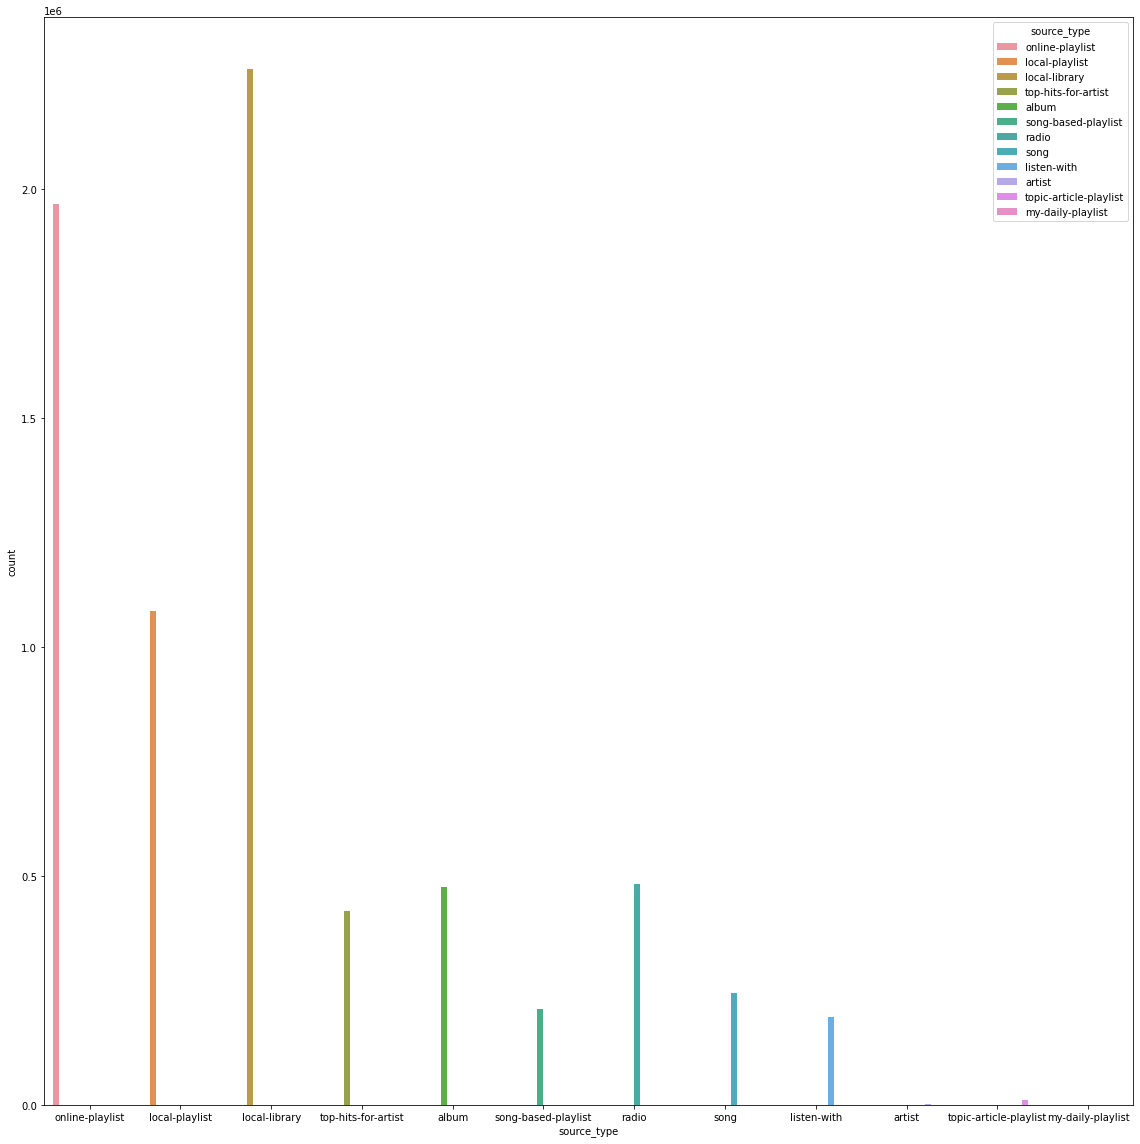

In [9]:
plt.figure(figsize=(16,16))
sns.countplot(x='source_type',hue='source_type',data=trainSet)
plt.tight_layout()


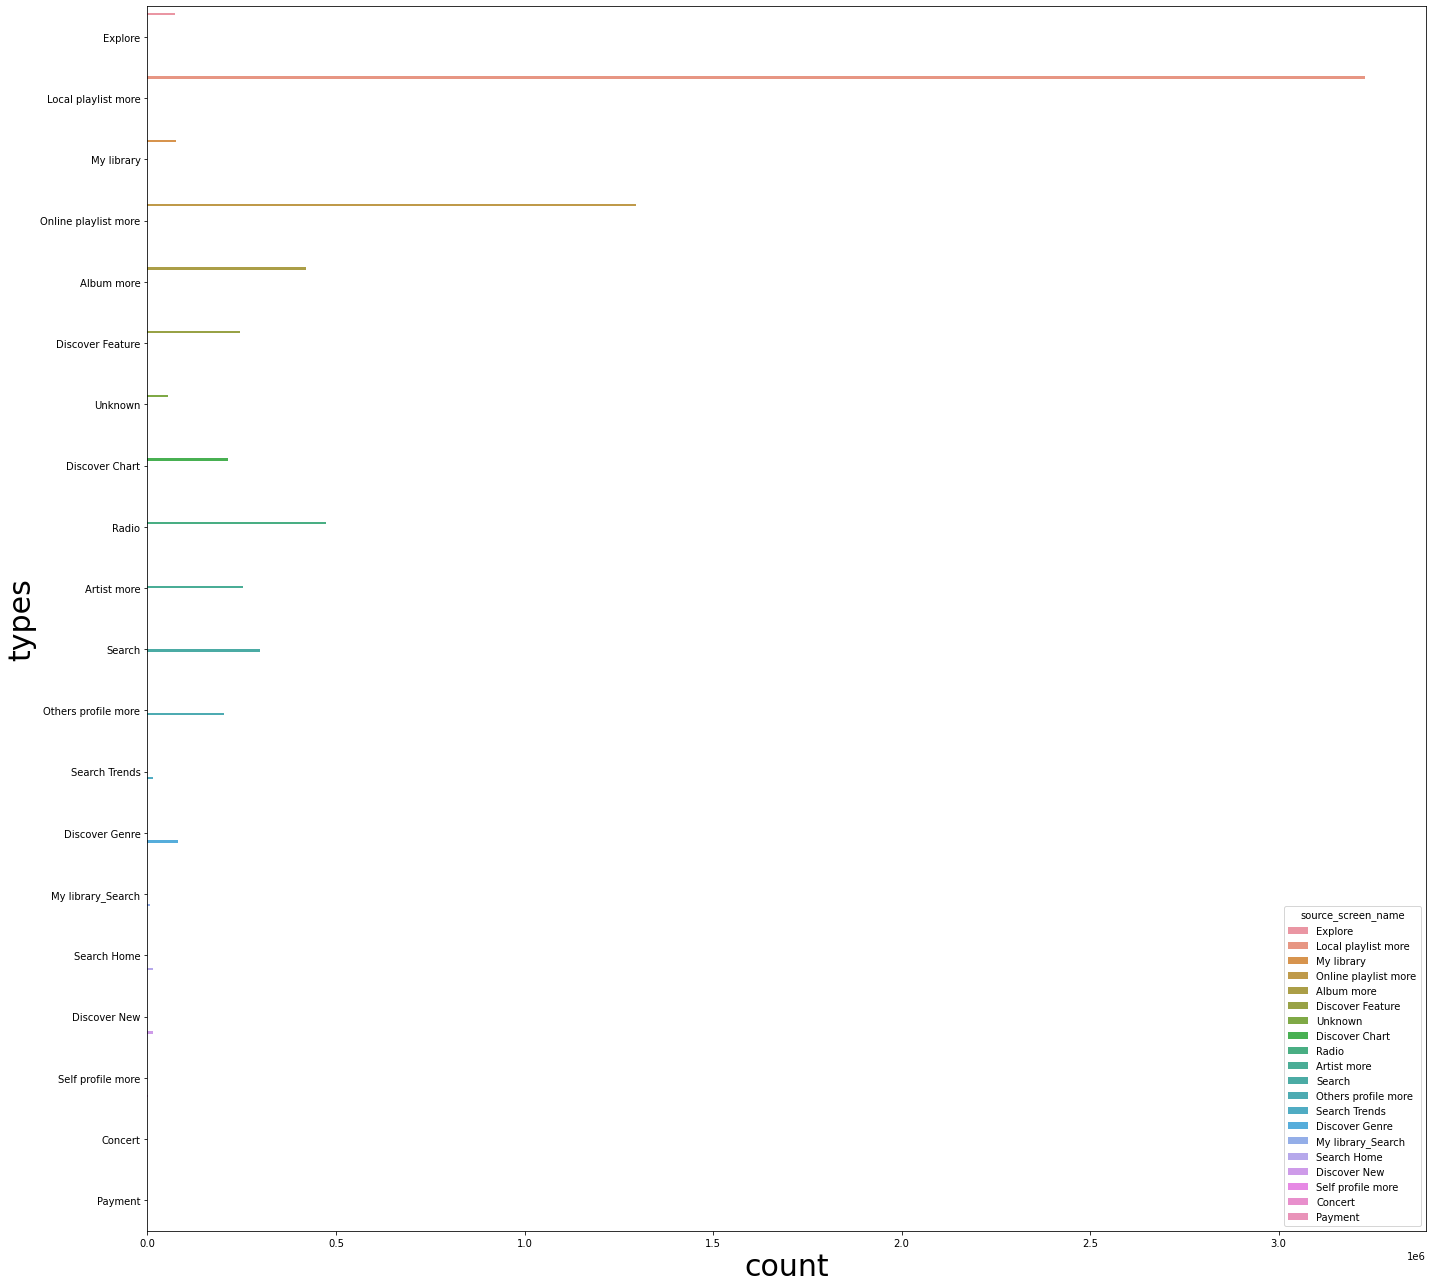

In [10]:
plt.figure(figsize=(20,18))
sns.countplot(y='source_screen_name',hue='source_screen_name',data=trainSet)
plt.xlabel('count',fontsize=30)
plt.ylabel('types',fontsize=30)
plt.tight_layout()


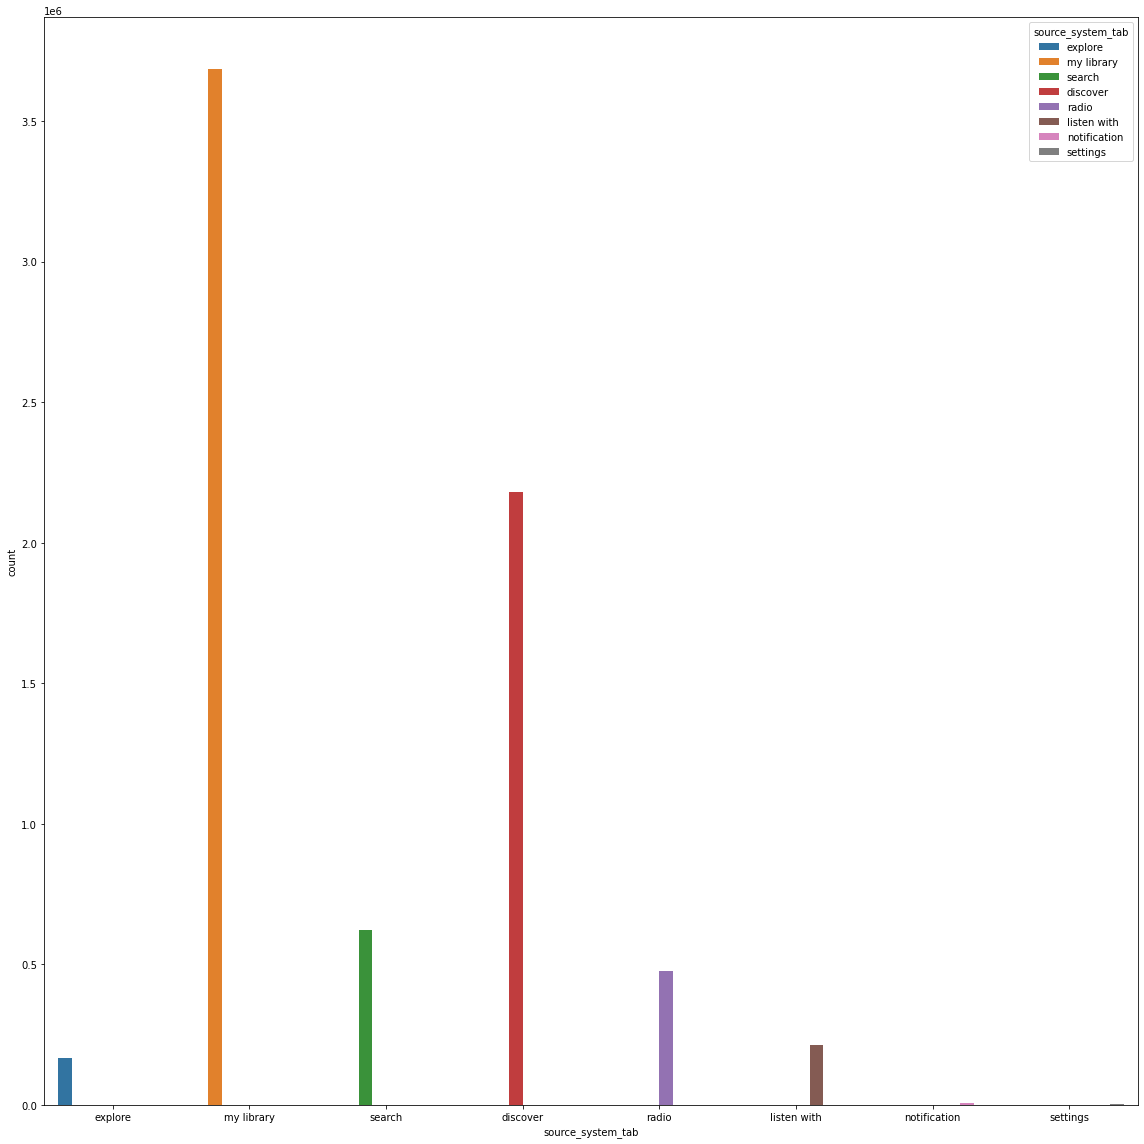

In [11]:
plt.figure(figsize=(16,16))
sns.countplot(x='source_system_tab',hue='source_system_tab',data=trainSet)
plt.tight_layout()


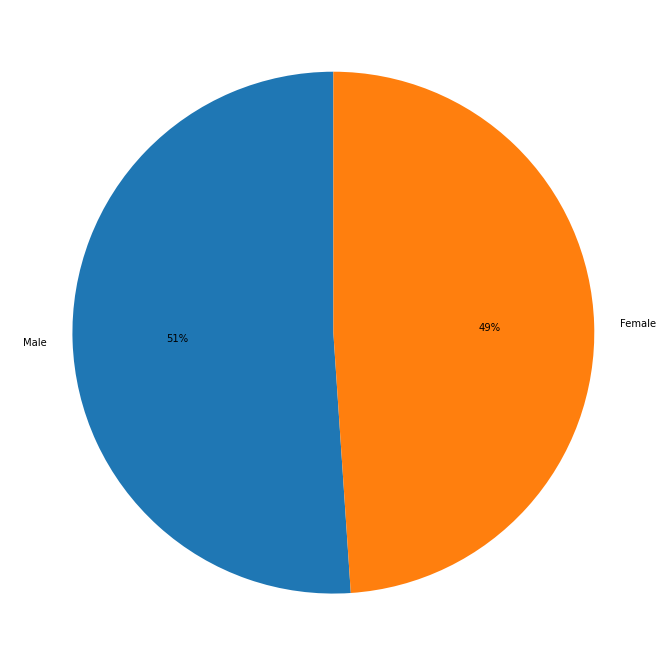

In [11]:
labels = ['Male','Female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(membersSet.gender)
plt.pie(sizes, labels=labels,autopct='%.0f%%',startangle=90)
plt.show()



C:\Users\RC\.conda\envs\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'registration time ')

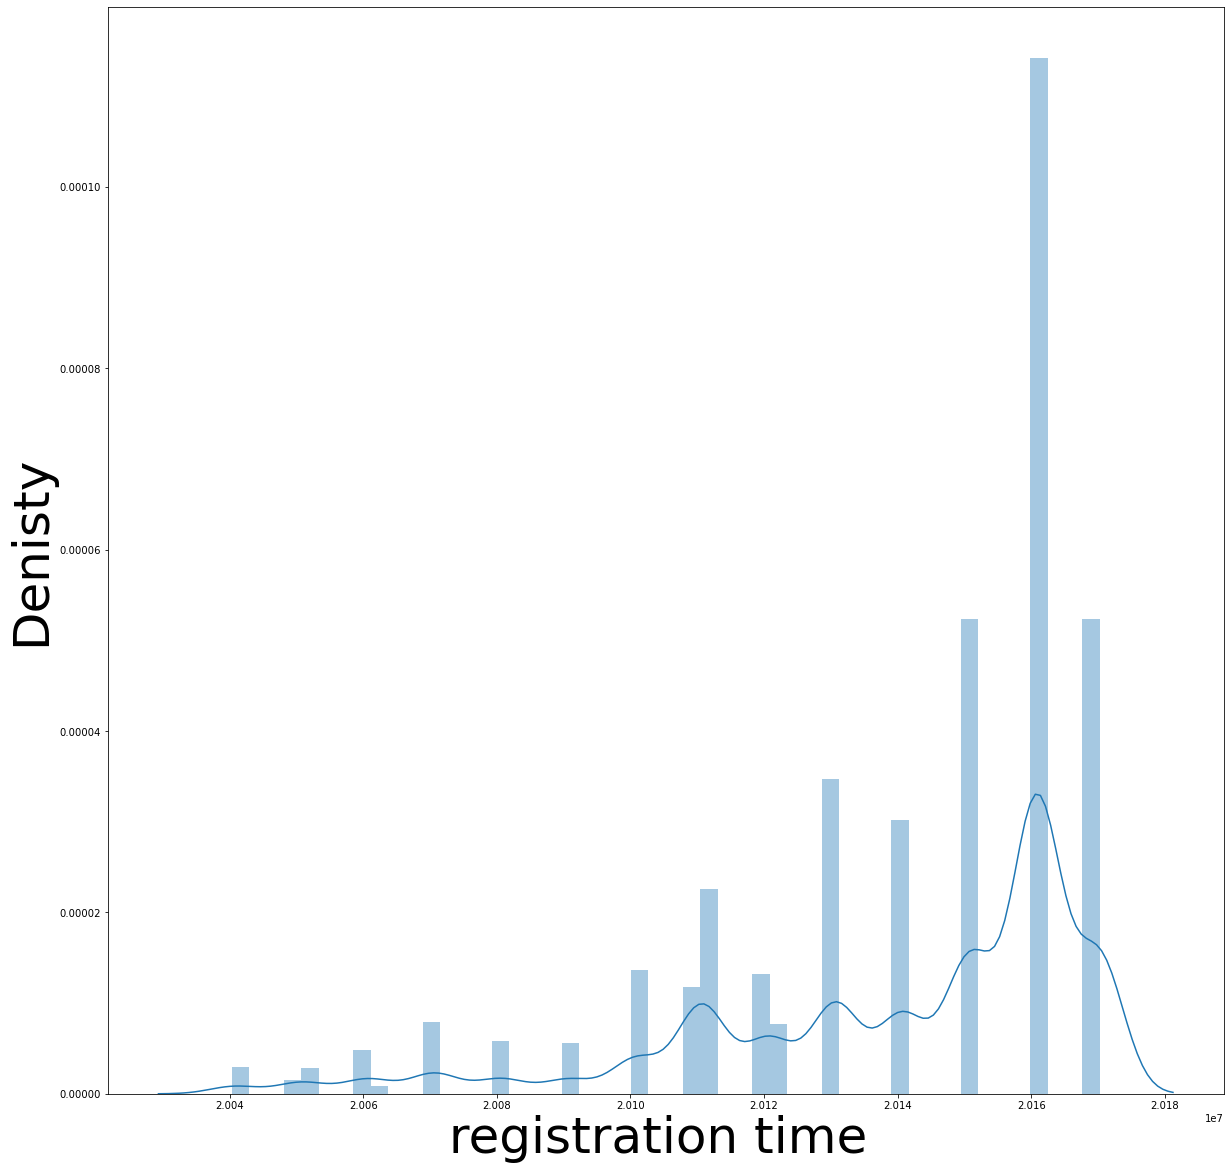

In [12]:
plt.figure(figsize = (20, 20)) 
sns.distplot(membersSet.registration_init_time)
plt.ylabel('Denisty',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)


In [61]:
Train_Members=pd.merge(trainSet,membersSet,on="msno", how="inner")
Train_Members.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
2,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
3,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005


In [62]:
Train_Members_Songs=pd.merge(Train_Members,songsSet,on="song_id", how="outer")
Train_Members_Songs.head()

MemoryError: Unable to allocate 71.1 MiB for an array with shape (9313824,) and data type object

In [ ]:
Test_Members=pd.merge(testSet,membersSet,on="msno", how="inner")
Test_Members_Songs=pd.merge(Test_Members,songsSet,on="song_id", how="outer")
Test_Members_Songs.head()

<AxesSubplot:>

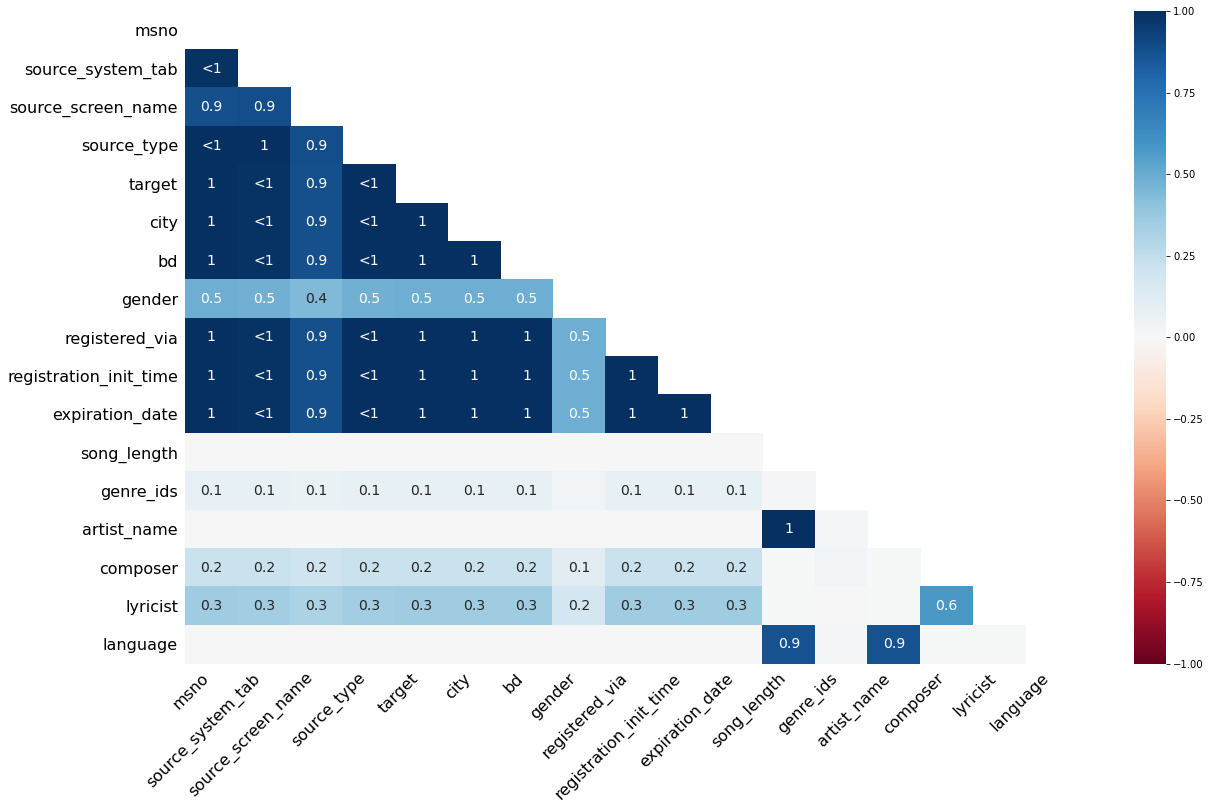

In [16]:
import missingno 
missingno.heatmap(Train_Members_Songs)


In [55]:
def getColsWNan(df):
    cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]
    return cols_with_missing

print(getColsWNan(Train_Members_Songs))
print(getColsWNan(Test_Members_Songs))


['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']


In [56]:

def Numeric_cols(df):
    return df.select_dtypes(include=np.number).columns.tolist()

cols_train=Numeric_cols(Train_Members_Songs)
print(cols_train)
cols_test=Numeric_cols(Test_Members_Songs)
print(cols_test)


['target', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'language']
['city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'language']


In [ ]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_train = pd.DataFrame(my_imputer.fit_transform(Train_Members_Songs[cols_test]))
imputed_test = pd.DataFrame(my_imputer.fit_transform(Test_Members_Songs[cols_test]))

imputed_train.columns = cols_train
imputed_test.columns = cols_test
Train_Members_Songs[cols_train] = imputed_train.columns
Test_Members_Songs[cols_test] = imputed_test.columns